# Markov Chain Monte Carlo with Gaussian Mixtures

Markov Chain Monte Carlo (MCMC) is a technique used to solve the problem of _sampling from a complicated distribution_. The sampling problem is as follows:

> Let $F$ be a distribution over a finite set $X$. You have access to the probability distribution function $f(x;\theta)$, which outputs the probability of drawing some $x \in X$ for some $D$, given some parameter set $\theta \in \Theta$. Sample N draws strategically from $f(x;\theta)$ such that we can approximate the density of $f$, thereby being able to compute expectations, confidence intervals, etc.

MCMC has some great properties that ensure convergence to the true distribution asymptotically. We are essentially sampling according to a recurrent and irriducible Markov chain (ergodic), which ensures that the enture space will eventually be sample to the limit.

We will focus on the approach of MCMC called the Metropolis-Hastings (MH) algorithm. MH allows a general proposal distribution $q$:

* $q(\tilde{x}^t)$ is the probability of proposing $\tilde{x}^t$
* MH is a special case where the proposal $q$ is a Gaussian with zero mean
* Accept proposed $\tilde{x}^t$ if $u \leq \frac{\tilde{p}(\tilde{x}^t)q(x^t|\tilde{x}^t)}{\tilde{p}(x^t)q(\tilde{x}^t|\tilde{x}^t)}$, where the extra terms ensure reversibility for assymetry of $q$.

The algorithm is as follows:

1. Add zero-mean Gaussian noise to $x^t$ to generate $\tilde{x}^t$
2. Generate $u$ from a $Unif(0,1)$
3. Accept the sample and set $x^{t+1} = \tilde{x}^t$ if $u \leq \frac{\tilde{p}(\tilde{x}^t}{\tilde{p}(x^t)}$, otherwise reject the sample and set $x^{t+1} = x^t$

We can think of this as a random walk, but we occationally reject steps that decrease probability. Let's try it for ourselves!



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from MCMC.mcmc import MCMC, DataDistribution

We the Gaussian mixture model GMM class below, with requires the input vectors for mean, standard deviation and the corresponding weights allotted to each cluster. These weights must sum to 1. The GMM formulation is as follows:

$$
p({\boldsymbol {\theta \in \{\mu, \Sigma\} }})=\sum _{i=1}^{K}w_i{\mathcal {N}}({\boldsymbol {\mu _{i},\Sigma _{i}}}) \quad \text{ s.t. } \sum_{i=1}^K w_i = 1
$$

In [2]:
mu1 = [-2.0, 2.0, -5.0, -10.0, 5]
sd1 = [1.0, 0.5, 0.5, 0.5, 1.5]
w1 = [0.2, 0.3, 0.2, 0.1, 0.2]
mixtureDens1 = DataDistribution(mu1, sd1, w1)

Once the GMM class has been called and initialized, we call the MCMC class, which requires an initializing value `x0`, the variance of the proposal distribution `sigma`, and the number of samples `n` to be drawn.

We can then run the MCMC procedure by calling the function mcmc from the class, which requires the initialized mixture density class object. The time required for the run will be outputed.

In [3]:
x0 = np.random.rand(1)
sigma = 10
n = int(1e5)

sim = MCMC(x0=x0, sigma=sigma, n=n)
x_out = sim.mcmc(mixtureDens1.gaussian_mixture)

Elapsed time: 6.08 seconds


The histogram of the simulated samples is outputted in the plot below. The red line corresponds to the true density. The starting value is outputted below the plot.

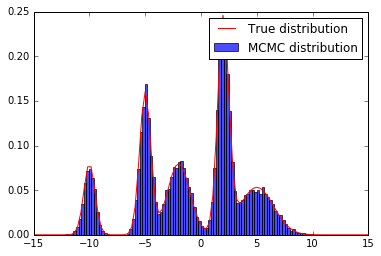

In [4]:
sim.plotHistorgram(mixtureDens1.gaussian_mixture, x_out, xrange = [-15, 15])

To get a sense of convergence to the true distribution, we can use metrics such as the cumulative mean or standard deviation.

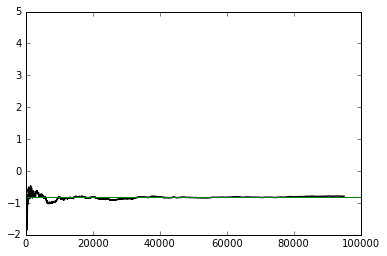

In [5]:
sim.plotFirstMomentConvergence(x_out)
plt.axhline(np.dot(mu1,w1), color='g')
plt.show()

In [6]:
out = sim.plotSecondMomentConvergence(x_out)
plt.axhline(np.dot(mu1,np.power(w1,2)), color = 'r')
plt.ylim([-200,200])

plt.show()

NameError: name 'pandas' is not defined